Assignment 4

submitted by : Tanisha Dua

Roll number : 102303545

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

from scipy.stats import gaussian_kde

In [4]:
import pandas as pd

data = pd.read_csv("newdata.csv", encoding="latin1")

In [5]:
print(data.columns)

Index(['stn_code', 'sampling_date', 'state', 'location', 'agency', 'type',
       'so2', 'no2', 'rspm', 'spm', 'location_monitoring_station', 'pm2_5',
       'date'],
      dtype='object')


In [6]:
x = data["no2"].dropna().values
r = 102303545

a = 0.5 * (r % 7)
b = 0.3 * ((r % 5) + 1)

z = x + a * np.sin(b * x)
z = z.reshape(-1, 1)

In [7]:
def make_generator():
  model=Sequential()
  model.add(Dense(8,activation='relu',input_dim=1))
  model.add(Dense(8,activation='relu'))
  model.add(Dense(1))
  return model


In [8]:
def make_discriminator():
  model=Sequential()
  model.add(Dense(8,activation='relu',input_dim=1))
  model.add(Dense(8,activation='relu'))
  model.add(Dense(1,activation='sigmoid'))
  return model

In [11]:
gen = make_generator()
disc = make_discriminator()

disc.compile(
    loss="binary_crossentropy",
    optimizer=Adam(0.001)
)

disc.trainable = False

gan = Sequential()
gan.add(gen)
gan.add(disc)

gan.compile(
    loss="binary_crossentropy",
    optimizer=Adam(0.001)
)

In [12]:
epochs = 2000
batch = 32

for i in range(epochs):

    disc.trainable = True

    idx = np.random.randint(0, z.shape[0], batch)
    real_z = z[idx]

    noise = np.random.normal(0, 1, (batch, 1))
    fake_z = gen.predict(noise, verbose=0)

    disc.train_on_batch(real_z, np.ones((batch, 1)))
    disc.train_on_batch(fake_z, np.zeros((batch, 1)))

    disc.trainable = False

    noise = np.random.normal(0, 1, (batch, 1))
    gan.train_on_batch(noise, np.ones((batch, 1)))

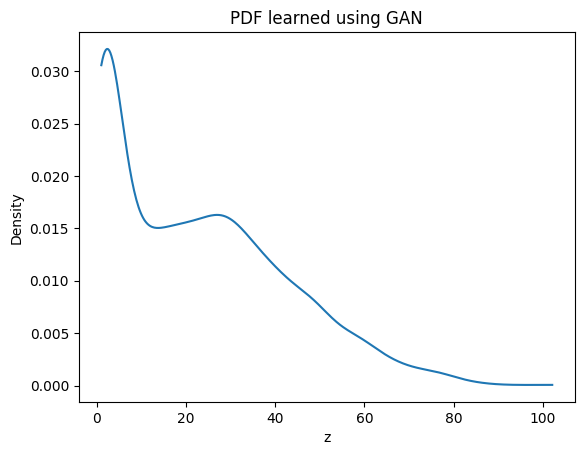

In [13]:
noise = np.random.normal(0, 1, (4000, 1))
z_fake = gen.predict(noise, verbose=0).flatten()

kde = gaussian_kde(z_fake)

z_range = np.linspace(min(z_fake), max(z_fake), 400)

plt.plot(z_range, kde(z_range))
plt.xlabel("z")
plt.ylabel("Density")
plt.title("PDF learned using GAN")
plt.show()

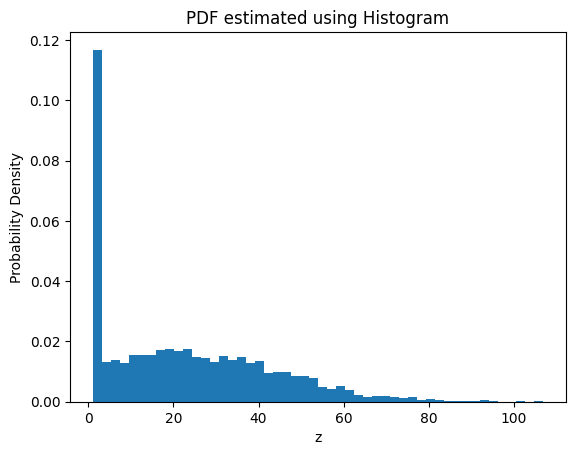

In [14]:
noise = np.random.normal(0, 1, (4000, 1))
z_fake = gen.predict(noise, verbose=0)

plt.hist(z_fake, bins=50, density=True)
plt.xlabel("z")
plt.ylabel("Probability Density")
plt.title("PDF estimated using Histogram")
plt.show()

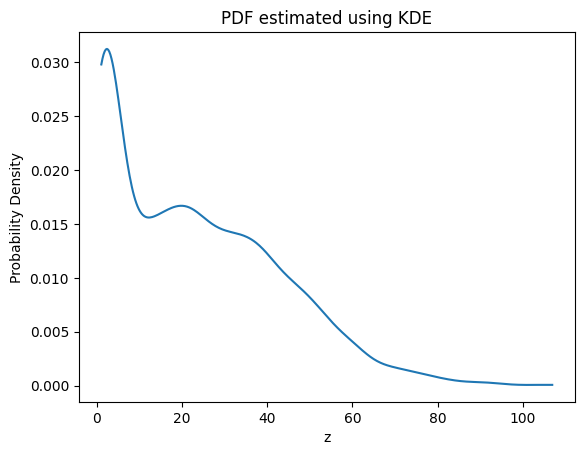

In [15]:
from scipy.stats import gaussian_kde

z_fake = z_fake.flatten()

kde = gaussian_kde(z_fake)

z_vals = np.linspace(min(z_fake), max(z_fake), 400)

plt.plot(z_vals, kde(z_vals))
plt.xlabel("z")
plt.ylabel("Probability Density")
plt.title("PDF estimated using KDE")
plt.show()